# Exploratory Data Analysis (EDA)

El objetivo de esta Jupyter Notebook es familiarizarnos con algunas librerías indispensables como: 
- Pandas ( Manipulación de datos )
- Matplotlib ( Gráficos )
- Seaborn ( Gráficos pero más bonitos )

Además, aprender distintas técnicas para explorar nuestros datos y sacar conclusiones relevante sobre las características. Esto nos ayudará a decidir si son buenas o no para entrenar un modelo de Machine Learning (ML). Para ello, veremos distintas formas de representar nuestros datos y cómo interpretarlos. 

In [1]:
# Cargamos los módulos necesarios

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

## Parte 1: Cargar los datos y darles forma

En esta sección veremos cómo cargar un dataset (de pruebas) y cómo manipularlo para que el formato de este sea práctico.

In [2]:
# Cargamos un dataset de prueba incluido en el módulo sklearn
 
X, y = load_iris(return_X_y=True, as_frame=True)
especies = list(load_iris()["target_names"])
X.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
# Mostramos las etiquetas 

y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [4]:
# Visualizamos el nombre de las especies que se corresponden a [0, 1, 2] 

especies = list(especies)
especies

['setosa', 'versicolor', 'virginica']

In [5]:
# Incluímos en el dataframe las etiquetas por comodidad 

X["labels"] = y
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Renombramos las columnas con nombres más sencillos
X.rename(
    {
        X.columns[0]: "sepal_length",
        X.columns[1]: "sepal_width",
        X.columns[2]: "petal_length",
        X.columns[3]: "petal_width"
    },
    axis="columns",
    inplace=True
)
X.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# Aplicamos una función sobre la columna de "labels"
# para cambiar (0, 1, 2) por (setosa, versicolor, virginica)
X["labels"] = X["labels"].apply(lambda label: especies[label])
X.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Parte 2: Visualización de los Datos

En esta sección veremos distintas formas de representar y visualizar nuestros datos

In [8]:
# librerías de python para realizar gráficos
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
sns.set_style("darkgrid")
sns.set_palette("pastel")


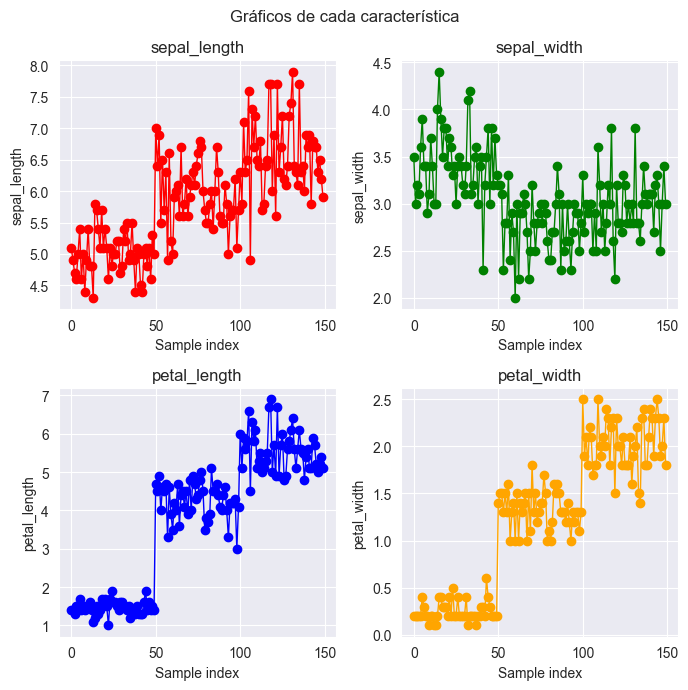

In [24]:
# Vamos a graficar todas las columnas

fig, ax = plt.subplots(
    figsize=(7, 7), nrows=2, ncols=2
)
fig.suptitle("Gráficos de cada característica")

current_ax = 1
colors = ['red', 'green', 'blue', 'orange']

for feature_name, feature_array in X.items():
    if feature_name == "labels":
        break
    plt.subplot(2, 2, current_ax)
    plt.plot(
        feature_array, 
        label=feature_name, 
        color=colors[current_ax - 1], 
        marker="o", 
        linewidth=1
    )
    plt.title(feature_name)
    plt.ylabel(feature_name)
    plt.xlabel("Sample index")
    plt.axis('auto')
    current_ax += 1
fig.tight_layout()

### Conclusiones del gráfico anterior

El gráfico anterior no nos aporta información valiosa. Esta forma de visualizar la información es poco práctica ya que: 
1. No muestra la **distribucion** de cada característica. 
2. No muestra la **relación** entre las diferentes caracteristicas.

**IMPORTANTE**: Cada muestra representa las medidas de una flor. Por tanto, usar el índice del dataframe como eje X (horizontal) no tiene sentido, puesto que no hay una relación temporal o espacial entre las muestras. 

### Mostrar la distribución de las características (HISTOGRAMA)

El histograma nos muestra:
- En el eje X -> El valor de una característica
- En el eje Y -> El número de muestras cuyo valor es = X

**NOTA**: Cuando X es un valor continuo (es decir, puede tomar cualquier valor entre -inf y +inf) el histograma se divide en bins (recipientes). Cada bin, alberga un rango de valores (por ejemplo un bin puede comprender todos los valores entre 1 y 5). En este caso, el valor de Y es el número de muestras cuyo valor queda dentro del bin X.  

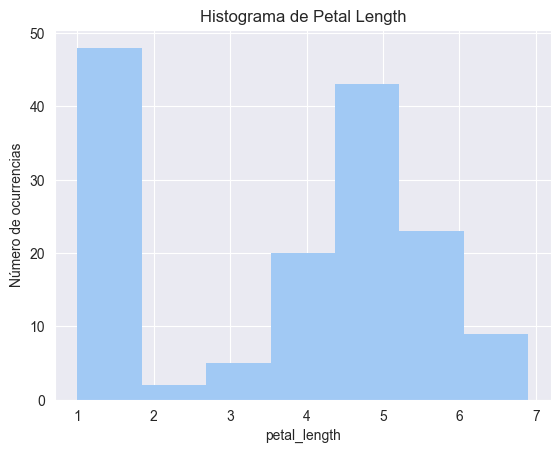

In [25]:
# Veamos un sencillo ejemplo de histograma
# En este caso veremos como se distribuyen los valores 
# de la característica petal_length

petal_length = X["petal_length"]
plt.hist(petal_length, bins=7)
plt.title("Histograma de Petal Length")
plt.xlabel("petal_length")
plt.ylabel("Número de ocurrencias")
plt.show()


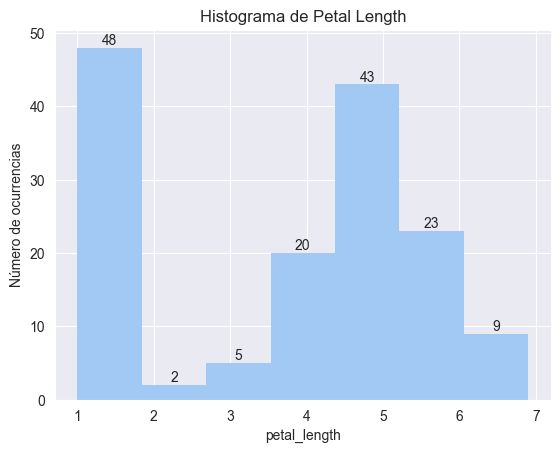

Counts: [48.  2.  5. 20. 43. 23.  9.]
Edges: [1.         1.84285714 2.68571429 3.52857143 4.37142857 5.21428571
 6.05714286 6.9       ]
Bars: <BarContainer object of 7 artists>
Bar: Rectangle(xy=(1, 0), width=0.842857, height=48, angle=0)


In [27]:
# TRUQUITO: Vamos a mostrar los valores en las barras
# y veremos también qué nos devuelve un histograma
counts, edges, bars = plt.hist(petal_length, bins=7)

plt.title("Histograma de Petal Length")
plt.xlabel("petal_length")
plt.ylabel("Número de ocurrencias")

plt.bar_label(bars)

plt.show()

print(f"Counts: {counts}")
print(f"Edges: {edges}")
print(f"Bars: {bars}")
print(f"Bar: {bars[0]}")

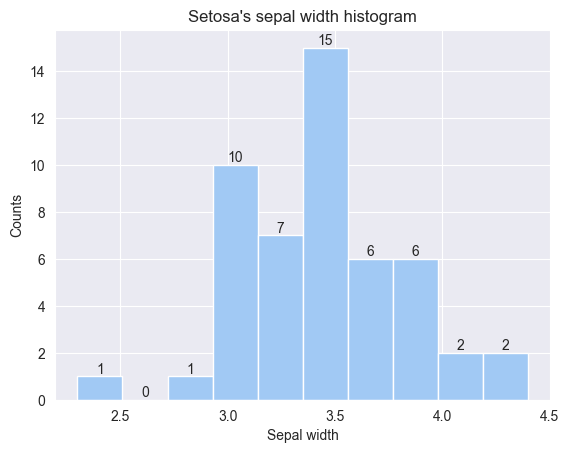

In [38]:
# Mostrar el histograma para una característica
# de una especie en concreto

setosa_sepal_width = X[X["labels"] == "setosa"]["sepal_width"]
counts, edges, bars = plt.hist(setosa_sepal_width, edgecolor="white", linewidth=1)
plt.bar_label(bars)
plt.title("Setosa's sepal width histogram")
plt.ylabel("Counts")
plt.xlabel("Sepal width")
plt.show()

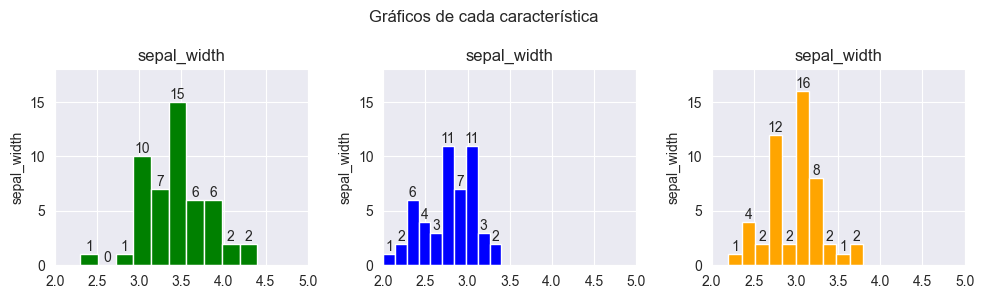

In [58]:
# Para comparar las características
# entre distintas clases podemos:

# Vamos a graficar todas las columnas

fig, ax = plt.subplots(
    figsize=(10, 3), nrows=1, ncols=3
)
fig.suptitle("Gráficos de cada característica")

current_ax = 1
colors = ['green', 'blue', 'orange']

species = X["labels"].unique()
feature_name = "sepal_width"

for specie in species:
    plt.subplot(1, 3, current_ax)
    feature = X[X["labels"] == specie][feature_name]
    
    count, edges, bars = plt.hist(
        feature, 
        label=feature_name, 
        color=colors[current_ax - 1], 
        linewidth=1
    )
    
    plt.xlim(2, 5)
    plt.ylim(0, 18)
    plt.title(feature_name)
    plt.ylabel(feature_name)
    plt.bar_label(bars)
    
    current_ax += 1
fig.tight_layout()

### BOX Plots
Otro tipo de gráficos muy útiles para ver como se distribuyen las muestras son los gráficos de cajas ("boxplots"). Estos nos muestran información  muy interesante como: 
- Ah
- B
- C
- D
Veamos algunos ejemplos

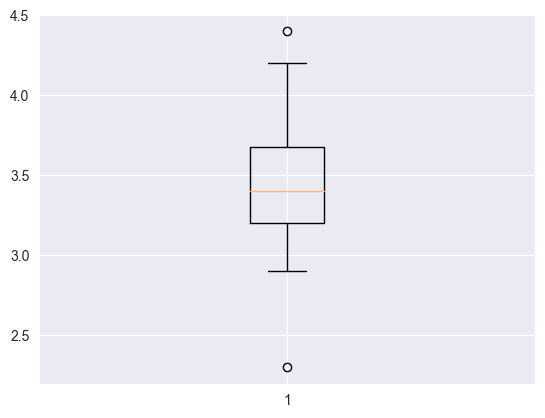

3.428


In [68]:
from statistics import mean


setosa_sepal_width = X[X["labels"] == "setosa"]["sepal_width"]

plt.boxplot(setosa_sepal_width)
plt.show()

In [81]:
pd.set_option('display.max_columns', None)
X_stats = X.groupby("labels").describe()
type(X_stats["petal_length"]["count"])

pandas.core.series.Series

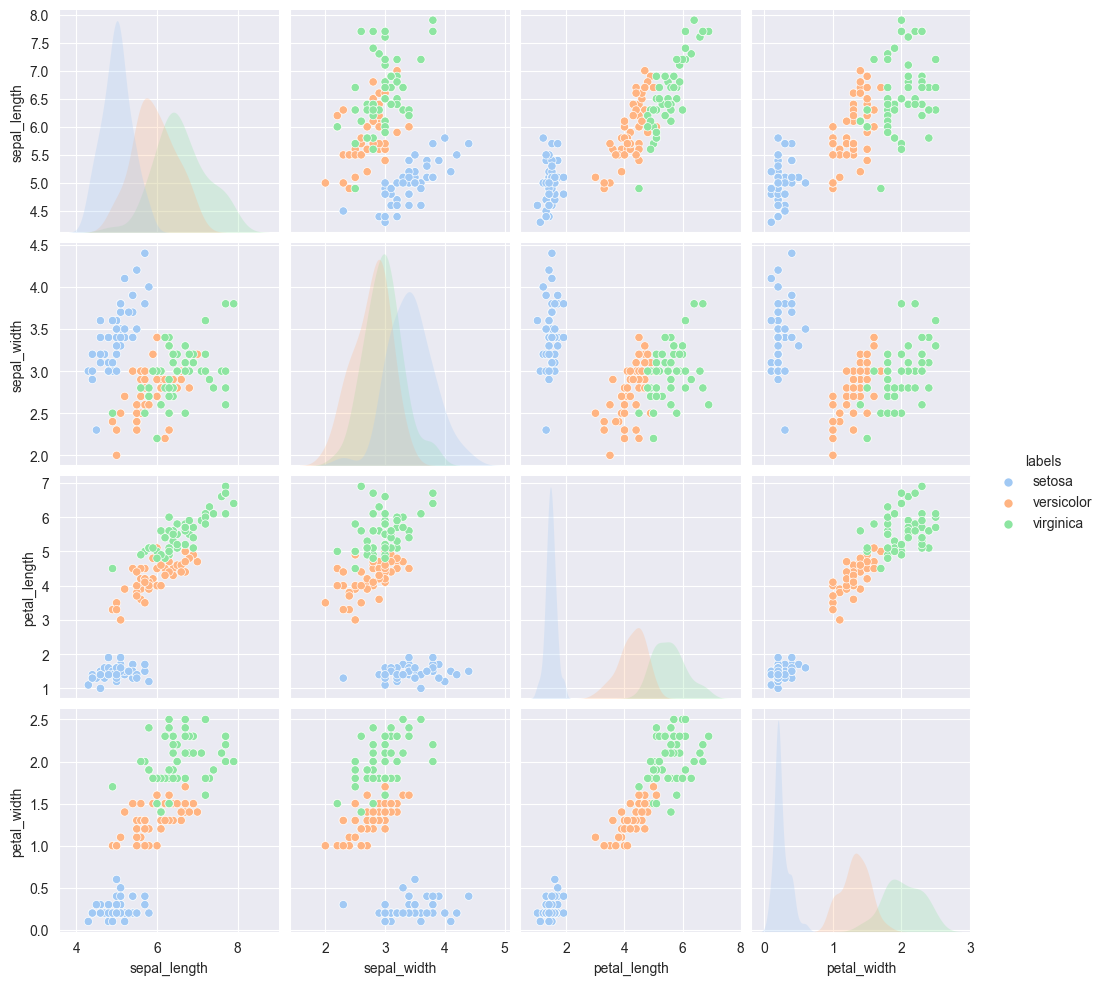

In [43]:
sns.pairplot(X, hue="labels")

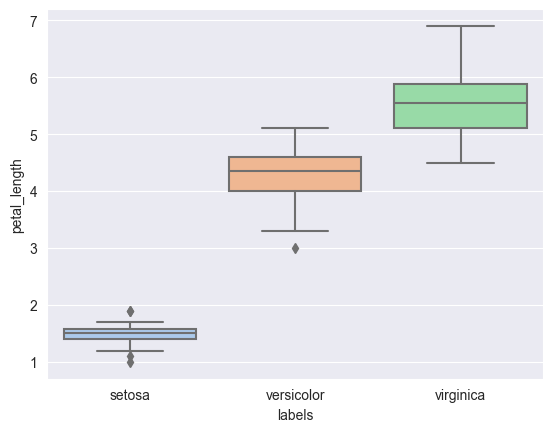

In [26]:
sns.boxplot(x='labels', y='petal_length', data=X)
plt.draw()